In [1]:
# Import Required Libraries
import cirq
import matplotlib.pyplot as plt
import numpy as np

# Part 1:

In [22]:
circuit = cirq.Circuit() # Get a new circuit.

In [23]:
qubit_list = [cirq.NamedQubit('q'+str(x)) for x in range(5)] # Define 5 qubits and store in a list.

In [24]:
operation_set0 = [cirq.H(qubit) for qubit in qubit_list] # Apply Hadamard operation on every qubit.

In [25]:
circuit.append(operation_set0) # Append the operations to the circuit.

In [28]:
operation_set1 = [cirq.CNOT(qubit_list[x], qubit_list[x+1]) for x in range(len(qubit_list)-1)] # Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4).

In [29]:
circuit.append(operation_set1) # Append the operations to the circuit.

In [31]:
circuit.append(cirq.SWAP(qubit_list[0], qubit_list[4])) # SWAP (0, 4) and append to the circuit.

In [33]:
circuit.append(cirq.rx(np.pi/2.0)(qubit_list[2])) # Rotate X with pi/2 on qubit 'q2' and append to the circuit.

In [34]:
print(circuit) # Plot the circuit.

q0: ───H───@──────────────────────×───
           │                      │
q1: ───H───X───@──────────────────┼───
               │                  │
q2: ───H───────X───@───Rx(0.5π)───┼───
                   │              │
q3: ───H───────────X───@──────────┼───
                       │          │
q4: ───H───────────────X──────────×───


# Part 2:

In [2]:
q0 = cirq.NamedQubit('q0') # Define a qubit

In [10]:
circuit = cirq.Circuit() # Get a new circuit.
simulator = cirq.Simulator() # Create a new instance of Simulator

In [11]:
for _ in range(200):
    circuit.append(cirq.rx(np.pi/50)(q0)) # Append 200 small rotate operations on qubit 'q0' to the circuit
#print(circuit)

In [12]:
prob_list = [] # Create an empty list to store probabilities.
# Simulate the circuit and append the probabilities of ground state to the list.
for step in simulator.simulate_moment_steps(circuit):
    probability = np.abs(step.state_vector()) ** 2
    prob_list.append(probability[0])

Text(0, 0.5, 'Probability of ground state')

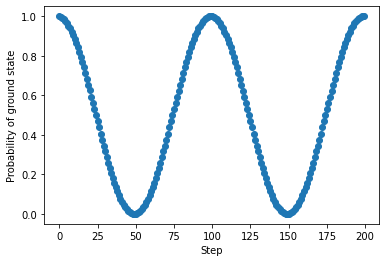

In [13]:
# Plot the probabilities.
plt.plot(prob_list, 'o')
plt.xlabel("Step")
plt.ylabel("Probability of ground state")